Summary Statistics:
                       Mean  Median  Standard Deviation
NH4-N (mg L-1)     0.110000   0.095            0.031388
OrthoP (ug L-1)   49.761731  44.480           47.812289
Total P (ug L-1)  87.762692  76.090           73.499505
TKN (mg L-1)       0.472500   0.415            0.248363


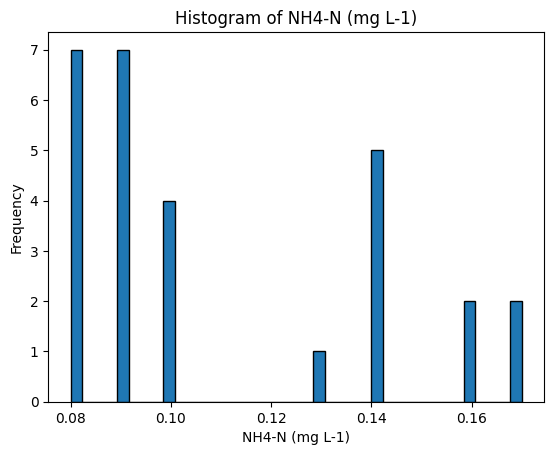

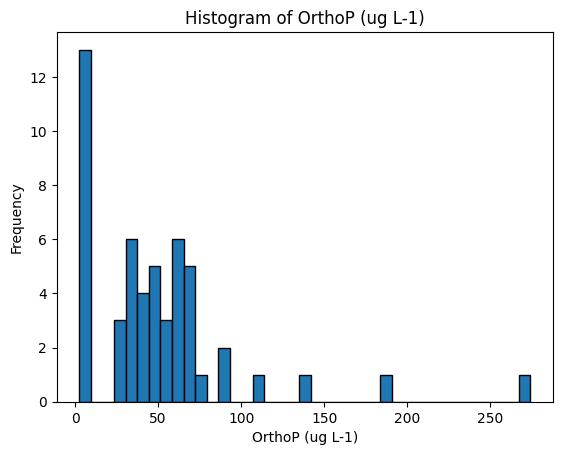

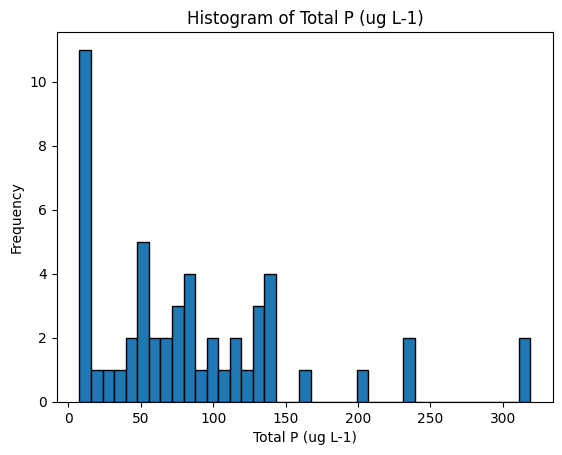

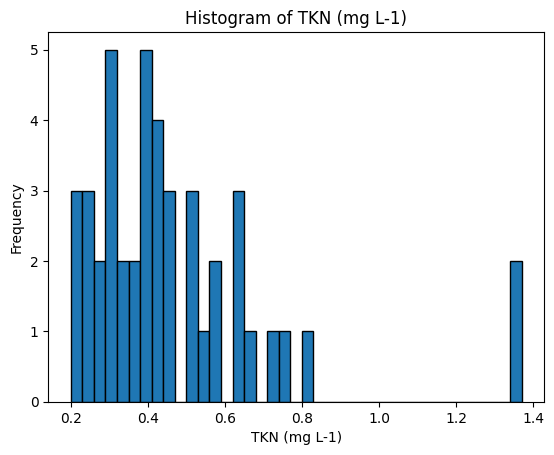

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the updated TSV file
file_path = 'Tampa_Bay_Data.txt'  # Update with your file path
data = pd.read_csv(file_path, sep='\t')

# Remove the specific row starting with "Piney Point Reservoir"
data = data[data["Location"] != "Piney Point Reservoir"]

# Clean the data (ensure numeric columns are properly converted)
numeric_columns = ["NH4-N (mg L-1)", "OrthoP (ug L-1)", "Total P (ug L-1)", "TKN (mg L-1)"]
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows where all numeric columns are NaN
data_cleaned = data.dropna(subset=numeric_columns, how='all')

# Calculate mean, median, and standard deviation for each numeric column
stats = {}
for column in numeric_columns:
    stats[column] = {
        "Mean": data_cleaned[column].mean(),
        "Median": data_cleaned[column].median(),
        "Standard Deviation": data_cleaned[column].std(),
    }

# Convert stats to a DataFrame for better presentation
stats_df = pd.DataFrame(stats)

# Print the statistics
print("Summary Statistics:")
print(stats_df.T)  # Transpose for a cleaner display

# Create customized histograms for each numeric column
for column in numeric_columns:
    plt.figure()
    # Dynamically define bins based on range of the data
    min_value = data_cleaned[column].min()
    max_value = data_cleaned[column].max()
    bins = np.linspace(min_value, max_value, 40)  # Create 30 equally spaced bins
    
    data_cleaned[column].hist(bins=bins, edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

Correlation Coefficients:
NH4-N (mg L-1) vs OrthoP (ug L-1) - Pearson: -0.18, Spearman: -0.12
NH4-N (mg L-1) vs Total P (ug L-1) - Pearson: -0.21, Spearman: -0.13
NH4-N (mg L-1) vs TKN (mg L-1) - Pearson: -0.56, Spearman: -0.65
OrthoP (ug L-1) vs Total P (ug L-1) - Pearson: 0.83, Spearman: 0.91
OrthoP (ug L-1) vs TKN (mg L-1) - Pearson: 0.32, Spearman: 0.31
Total P (ug L-1) vs TKN (mg L-1) - Pearson: 0.24, Spearman: 0.34


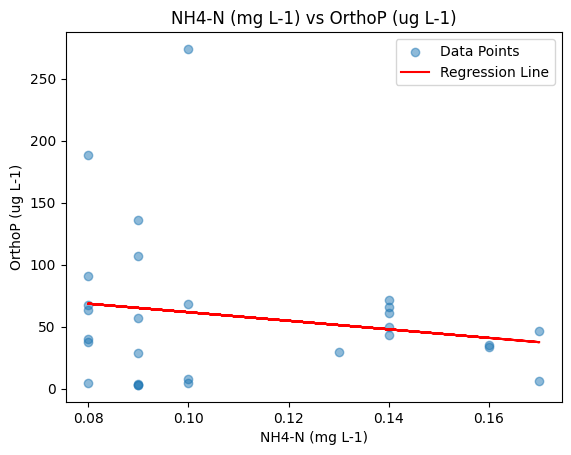

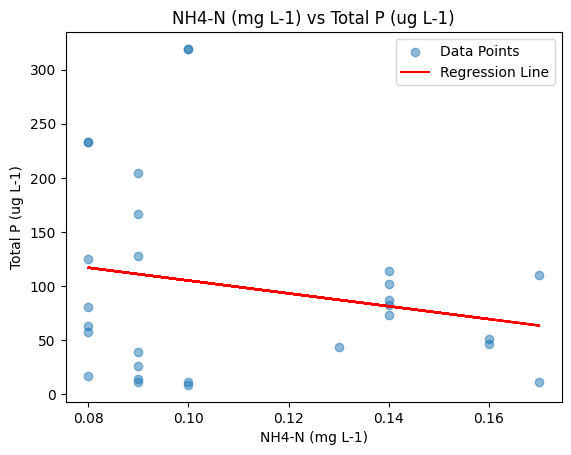

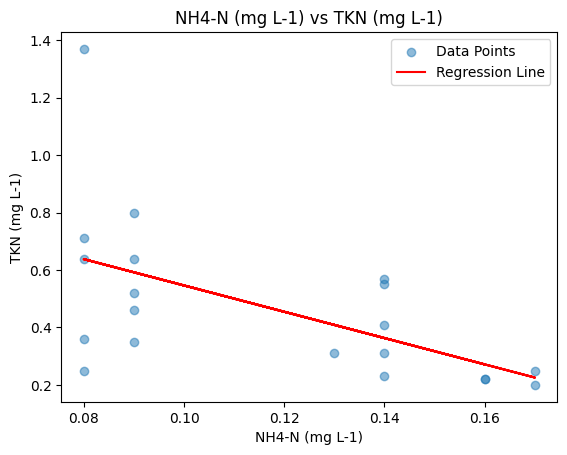

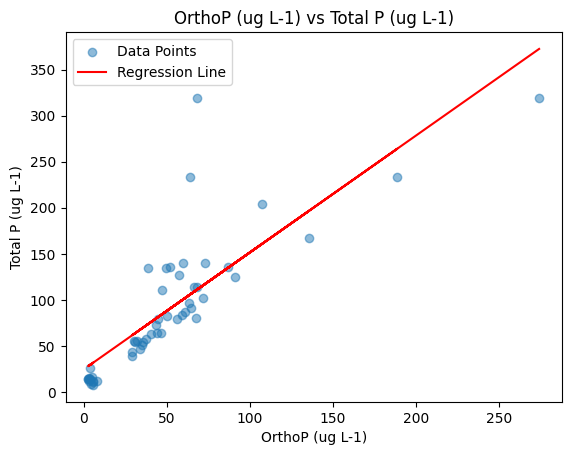

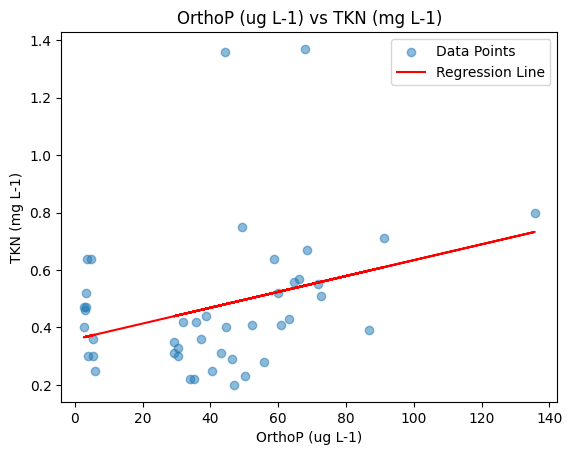

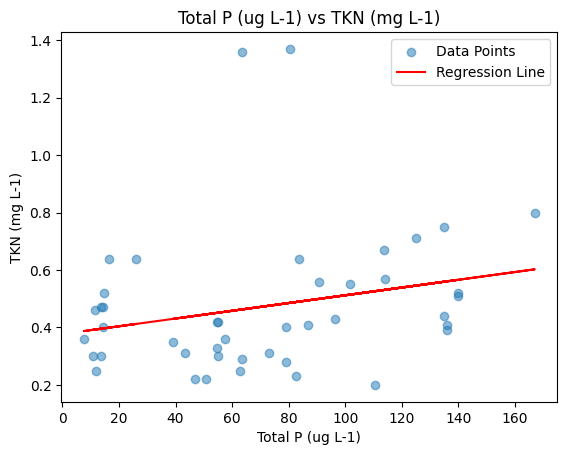

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# Load the updated TSV file
file_path = 'Tampa_Bay_Data.txt'  # Update with your file path
data = pd.read_csv(file_path, sep='\t')

# Remove the specific row starting with "Piney Point Reservoir"
data = data[data["Location"] != "Piney Point Reservoir"]

# Clean the data (ensure numeric columns are properly converted)
numeric_columns = ["NH4-N (mg L-1)", "OrthoP (ug L-1)", "Total P (ug L-1)", "TKN (mg L-1)"]
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows where all numeric columns are NaN
data_cleaned = data.dropna(subset=numeric_columns, how='all')

# Task 2: Correlation
print("Correlation Coefficients:")
correlation_results = {}

# Calculate Pearson and Spearman correlations for each pair of numeric columns
for i, col1 in enumerate(numeric_columns):
    for col2 in numeric_columns[i+1:]:  # Avoid duplicates by iterating only forward
        # Filter rows where neither column has NaN
        valid_data = data_cleaned[[col1, col2]].dropna()
        pearson_corr, _ = pearsonr(valid_data[col1], valid_data[col2])
        spearman_corr, _ = spearmanr(valid_data[col1], valid_data[col2])
        correlation_results[(col1, col2)] = {
            "Pearson": pearson_corr,
            "Spearman": spearman_corr
        }
        print(f"{col1} vs {col2} - Pearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}")

# Scatter plots with regression lines (no duplicates)
for i, col1 in enumerate(numeric_columns):
    for col2 in numeric_columns[i+1:]:  # Avoid duplicates
        # Filter rows where neither column has NaN
        valid_data = data_cleaned[[col1, col2]].dropna()
        x = valid_data[col1].values.reshape(-1, 1)
        y = valid_data[col2].values

        # Fit linear regression model
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)

        # Scatter plot
        plt.figure()
        plt.scatter(valid_data[col1], valid_data[col2], alpha=0.5, label="Data Points")
        plt.plot(valid_data[col1], y_pred, color="red", label="Regression Line")
        plt.title(f"{col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend()
        plt.grid(False)
        plt.show()

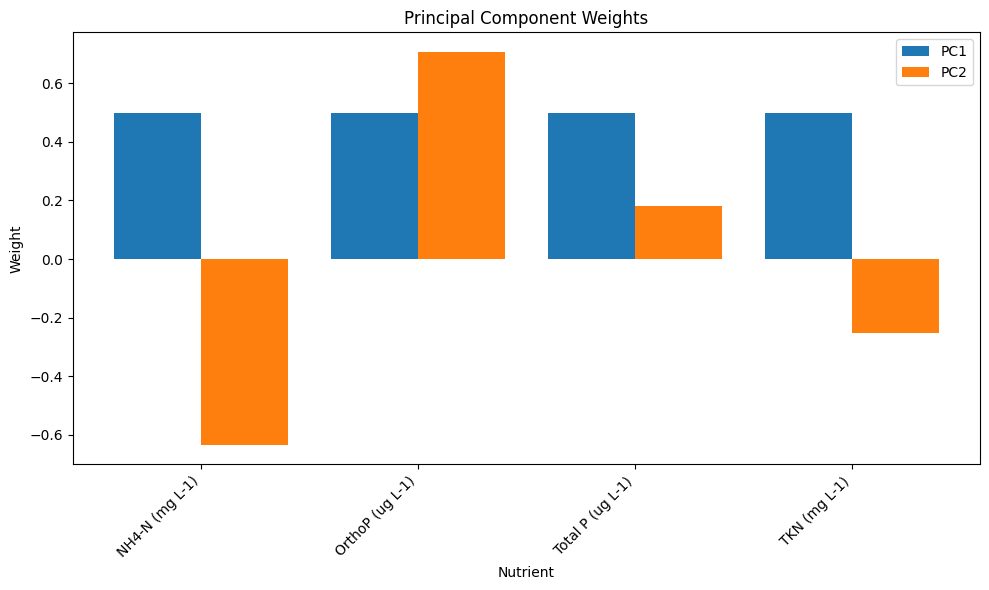

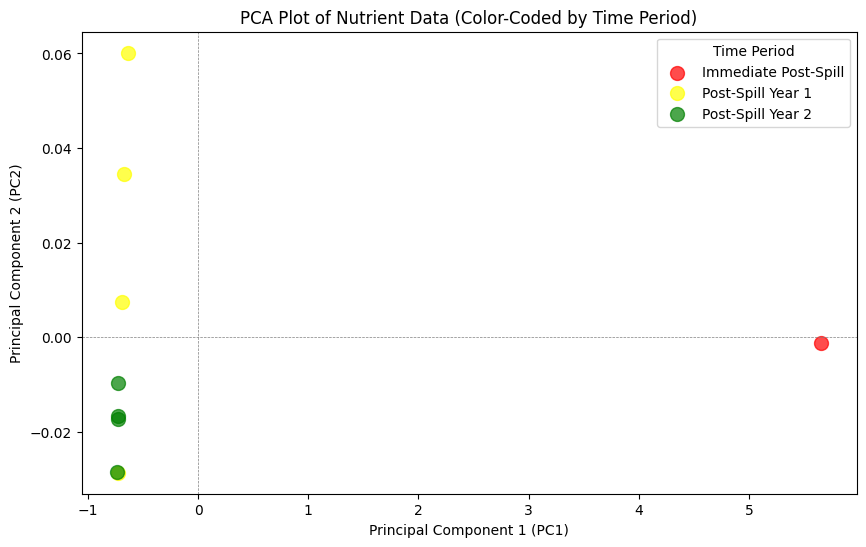

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('Tampa_PCA.txt', sep="\t")

# Step 2: Assign time periods based on user-defined ranges
data['Time Period'] = None
data.loc[(data['Year'] == 2020) & (data['Month'] == 'October'), 'Time Period'] = 'Immediate Post-Spill'
data.loc[(data['Year'] == 2021) & (data['Month'].isin(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])), 'Time Period'] = 'Post-Spill Year 1'
data.loc[(data['Year'] == 2022) & (data['Month'].isin(['January', 'February', 'March', 'April'])), 'Time Period'] = 'Post-Spill Year 2'

# Step 3: Filter only rows with a defined time period
data_cleaned = data.dropna(subset=['Time Period'])

# Step 4: Select numerical columns for PCA
numeric_columns = ['NH4-N (mg L-1)', 'OrthoP (ug L-1)', 'Total P (ug L-1)', 'TKN (mg L-1)']

# Step 5: Scale the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[numeric_columns])

# Step 6: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Step 7: Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Time Period'] = data_cleaned['Time Period'].values

# Step 8: Plot principal component weights bar graph
plt.figure(figsize=(10, 6))
components = pca.components_.T  # Transpose to align features with components
x_labels = numeric_columns
x = np.arange(len(x_labels))

# Plot PC1 and PC2 weights
plt.bar(x - 0.2, components[:, 0], width=0.4, label='PC1')
plt.bar(x + 0.2, components[:, 1], width=0.4, label='PC2')

plt.xticks(x, x_labels, rotation=45, ha='right')
plt.title("Principal Component Weights")
plt.xlabel("Nutrient")
plt.ylabel("Weight")
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Plot PCA results with color coding for time periods
colors = {'Immediate Post-Spill': 'red', 'Post-Spill Year 1': 'yellow', 'Post-Spill Year 2': 'green'}
plt.figure(figsize=(10, 6))

for period, color in colors.items():
    subset = pca_df[pca_df['Time Period'] == period]
    plt.scatter(subset['PC1'], subset['PC2'], label=period, color=color, alpha=0.7, s=100)

# Add plot titles and labels
plt.title("PCA Plot of Nutrient Data (Color-Coded by Time Period)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.legend(title="Time Period", loc="upper right")
plt.grid(False)

# Show the plot
plt.show()

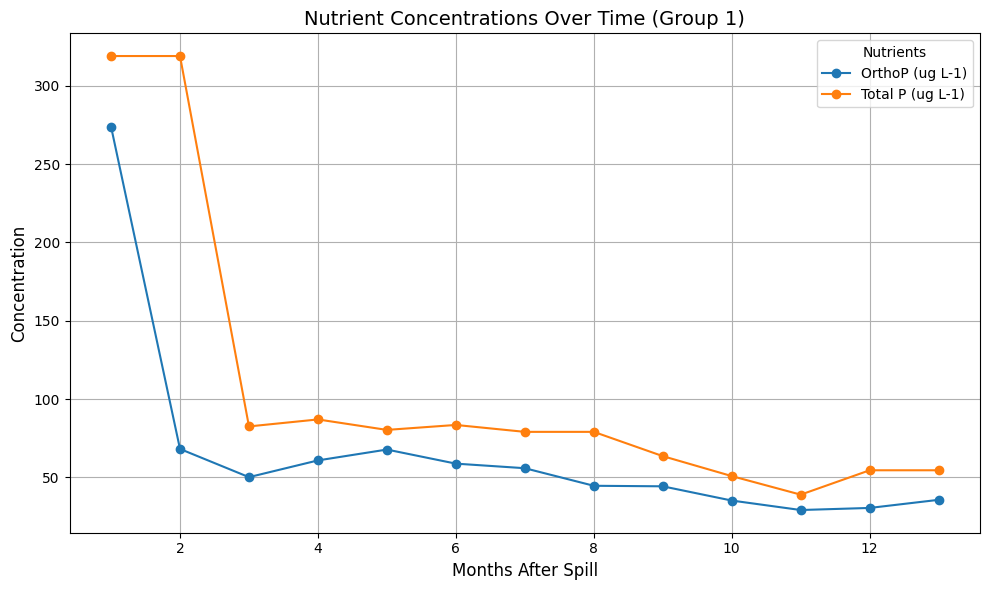

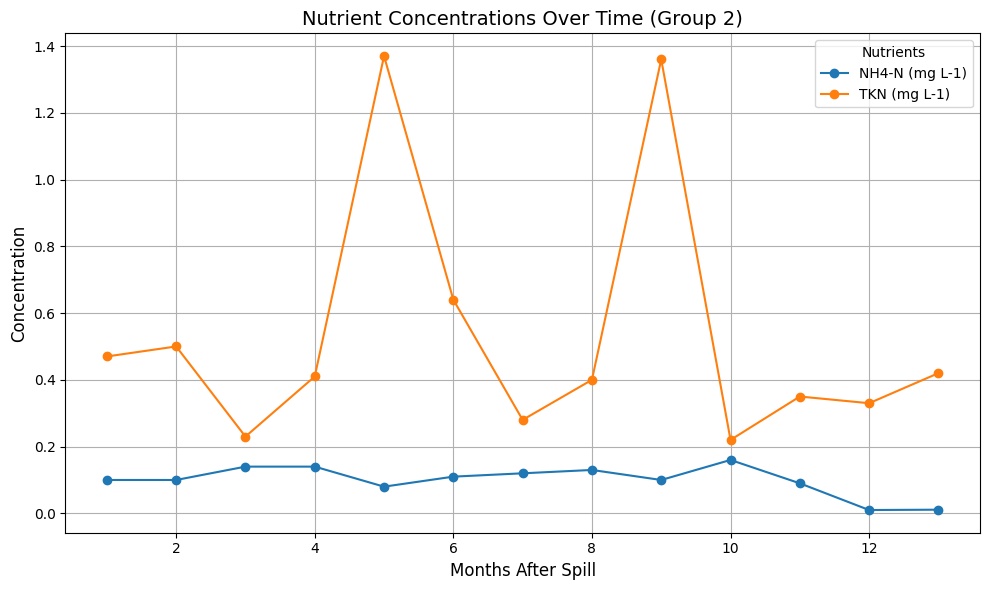

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Tampa_Graph.txt'  # Replace with the correct path if needed
data = pd.read_csv(file_path, sep="\t")

# Extract necessary columns
months = data['Month']
nutrients_group1 = ['OrthoP (ug L-1)', 'Total P (ug L-1)']
nutrients_group2 = ['NH4-N (mg L-1)', 'TKN (mg L-1)']

# Plot Group 1: OrthoP and Total P
plt.figure(figsize=(10, 6))
for nutrient in nutrients_group1:
    plt.plot(months, data[nutrient], marker='o', label=nutrient)

plt.title('Nutrient Concentrations Over Time (Group 1)', fontsize=14)
plt.xlabel('Months After Spill', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.legend(title='Nutrients')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Group 2: NH4-N and TKN
plt.figure(figsize=(10, 6))
for nutrient in nutrients_group2:
    plt.plot(months, data[nutrient], marker='o', label=nutrient)

plt.title('Nutrient Concentrations Over Time (Group 2)', fontsize=14)
plt.xlabel('Months After Spill', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.legend(title='Nutrients')
plt.grid(True)
plt.tight_layout()
plt.show()